In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img(img, mode=None, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    plt.imshow(img[:,:,::-1], cmap=mode)
    plt.axis('off')
    plt.show()

In [3]:
img1 = cv.imread('/Users/dengjiacheng/PycharmProjects/opencv1/normal/image/littledog.jpeg')

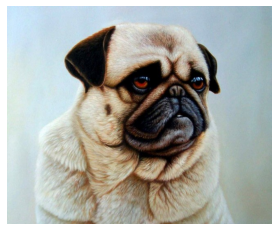

In [4]:
show_img(img1)

In [6]:
height, width = img1.shape[:2]

In [10]:
absolute_resize = cv.resize(img1, (2*width, 2*height), interpolation=cv.INTER_LINEAR)

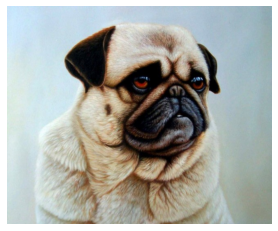

In [17]:
show_img(absolute_resize)

In [18]:
absolute_resize.shape

(1070, 1300, 3)

In [13]:
relative_resize = cv.resize(img1, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)

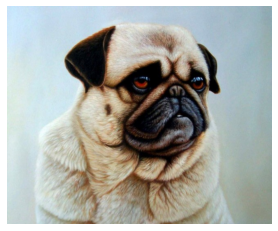

In [15]:
show_img(relative_resize)

In [16]:
relative_resize.shape

(1070, 1300, 3)

In [49]:
def test(**args):
    print(type(args))
    print(args)
    print(*args)

In [51]:
test(a=1, b=2)

<class 'dict'>
{'a': 1, 'b': 2}
a b


In [64]:
%matplotlib inline

In [65]:
def show_more_img(row_col, *imgs):
    fig, axs = plt.subplots(*row_col, figsize=(20, 16))
    for i, img in enumerate(imgs):
        axs[i].imshow(img[:,:,::-1])

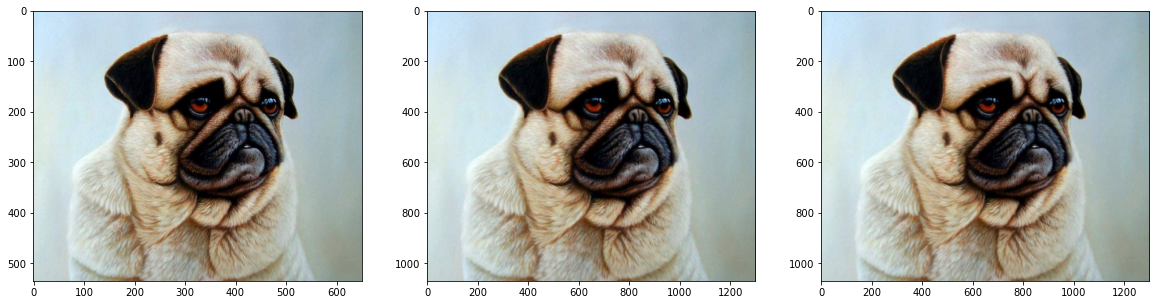

In [66]:
show_more_img((1, 3), img1, absolute_resize, relative_resize)

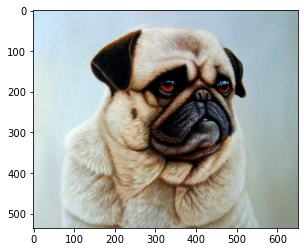

In [69]:
plt.imshow(img1[:,:,::-1], cmap='gray')

In [71]:
cv.imwrite('dog_gray.png', cv.cvtColor(img1, cv.COLOR_BGR2GRAY))

True

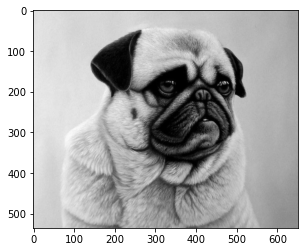

In [72]:
plt.imshow(cv.imread('/Users/dengjiacheng/PycharmProjects/opencv1/normal/dog_gray.png'))

# 图像平移

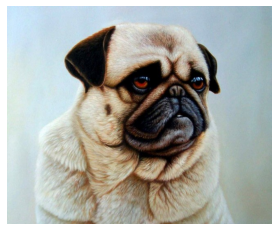

In [77]:
show_img(img1)

In [76]:
height, width

(535, 650)

In [78]:
M = np.float32([[1, 0, 100], [0, 1, 100]])

In [80]:
dst = cv.warpAffine(img1, M, (width, height))

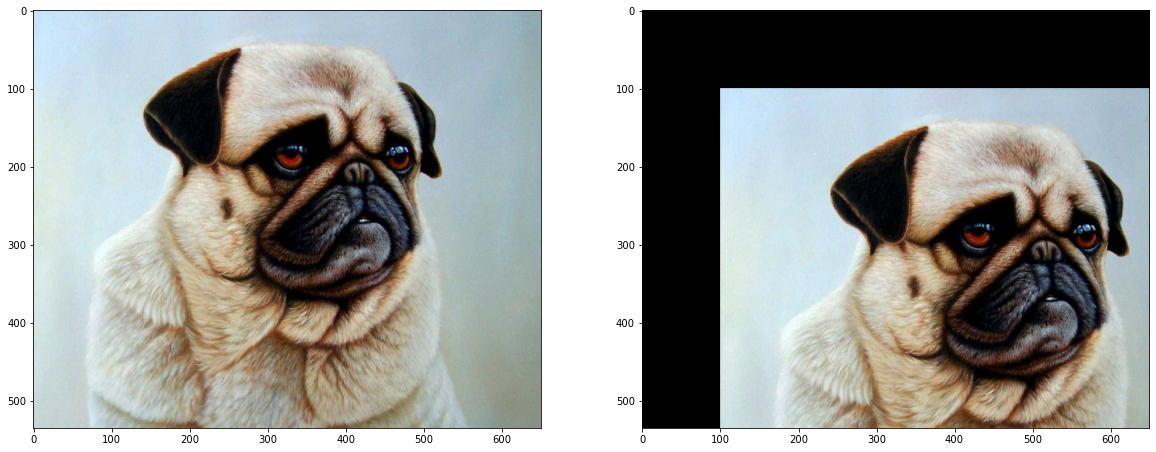

In [82]:
show_more_img((1, 2), img1, dst)

# 图像旋转

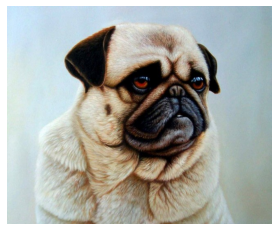

In [83]:
show_img(img1)

In [84]:
height, width

(535, 650)

In [91]:
M = cv.getRotationMatrix2D((width/2, height/2), 45, 0.5)

In [92]:
dst = cv.warpAffine(img1, M, (width, height))

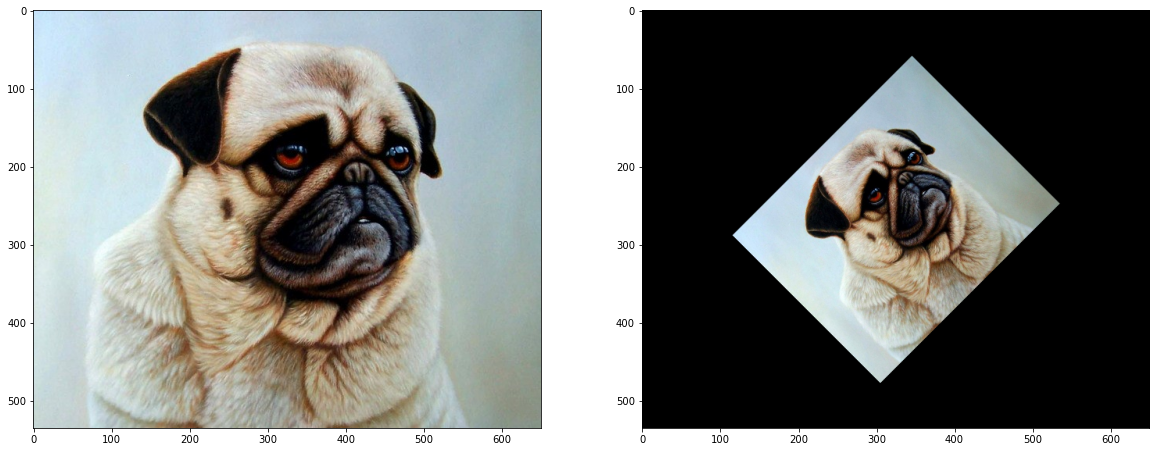

In [93]:
show_more_img((1, 2), img1, dst)

In [94]:
img2 = cv.imread('/Users/dengjiacheng/PycharmProjects/opencv1/normal/image/kids.jpg')

In [95]:
rows, cols = img2.shape[:2]

In [96]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[100,100],[200,50],[100,250]])

In [97]:
M = cv.getAffineTransform(pts1, pts2)

In [98]:
dst = cv.warpAffine(img2, M, (cols, rows))

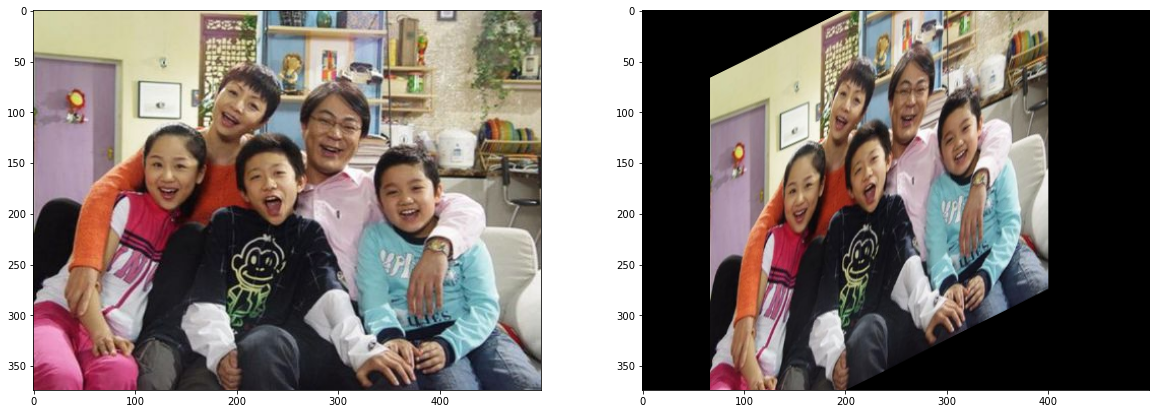

In [99]:
show_more_img((1, 2), img2, dst)

# 透射变换

In [100]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[100,145],[300,100],[80,290],[310,300]])

In [101]:
T = cv.getPerspectiveTransform(pts1, pts2)

In [102]:
dst = cv.warpPerspective(img2, T, img2.shape[:2][::-1])

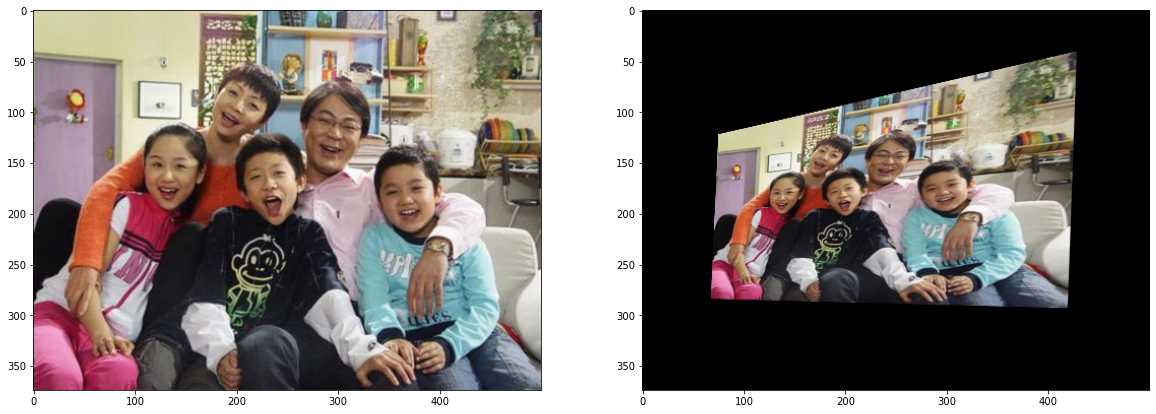

In [103]:
show_more_img((1, 2), img2, dst)

# 图像金字塔

In [104]:
up_img = cv.pyrUp(img2)
down_img = cv.pyrDown(img2)

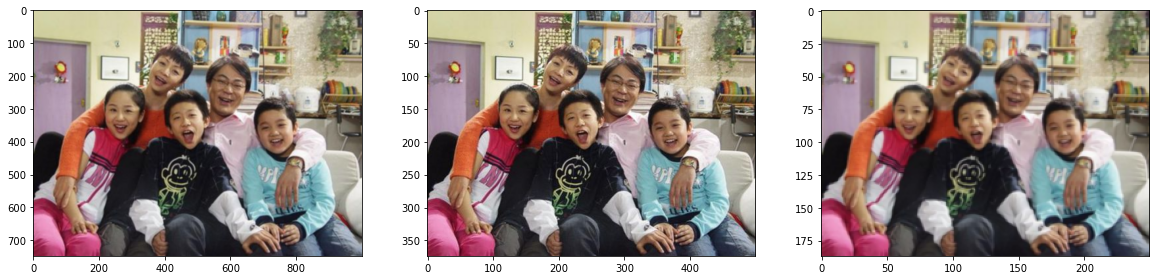

In [105]:
show_more_img((1, 3), up_img, img2, down_img)